In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [4]:
#toto som sem dal, aby sa na jedno spustenie pripravil ten dataset tak ako ma byt, aby nebolo nutne spustat tolko buniek
train_data = pd.read_csv('data/train.csv')
train_data = train_data.set_index('Unnamed: 0')
train_data.index.names = ['id']

import json
raw = train_data.loc[1, 'medical_info']
raw = raw.replace("'", '"')
data = json.loads(raw)

for k in data.keys():
    train_data[k] = np.nan

for i in range(train_data.shape[0]):
    raw = train_data['medical_info'][i]
    raw = raw.replace("'", '"')
    data = json.loads(raw)
    for att in data.keys():
        train_data.loc[i, att] = data[att]
        
train_data = train_data.drop(columns=['medical_info'])

train_data['FTI'] = pd.to_numeric(train_data['FTI'], errors='coerce')

for i in range(train_data.shape[0]):
    train_data.loc[i, 'test'], train_data.loc[i, 'testID'] = str(train_data['class'][i]).split(".|")

In [4]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,Unnamed: 0,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
0,0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 35 columns):
Unnamed: 0            2800 non-null int64
age                   2519 non-null float64
on thyroxine          2800 non-null object
query on thyroxine    2800 non-null object
pregnant              2800 non-null object
thyroid surgery       2800 non-null object
I131 treatment        2800 non-null object
lithium               2800 non-null object
goitre                2800 non-null object
tumor                 2800 non-null object
hypopituitary         2800 non-null object
TSH                   2516 non-null float64
T3 measured           2800 non-null object
T3                    2215 non-null float64
TT4                   2451 non-null object
T4U                   2503 non-null float64
FTI measured          2800 non-null object
TBG measured          2800 non-null object
TBG                   2800 non-null object
referral source       2800 non-null object
class                 2800 non

In [5]:
b = pd.Series(train_data['Unnamed: 0']) == pd.Series(np.arange(train_data.shape[0]))
b[b == False].count()

0

In [6]:
train_data = train_data.set_index('Unnamed: 0')
train_data.index.names = ['id']
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,"{'TSH measured':'t','sex':'M','query hyperthyr..."
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,"{'TSH measured':'t','sex':'F','query hyperthyr..."
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,"{'TSH measured':'f','sex':'F','query hyperthyr..."
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,"{'TSH measured':'t','sex':'F','query hyperthyr..."
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,"{'TSH measured':'t','sex':'M','query hyperthyr..."


In [28]:
train_data['medical_info'][0]

"{'TSH measured':'t','sex':'M','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'88','sick':'f','T4U measured':'t','psych':'f','query hypothyroid':'f'}"

In [7]:
import json
raw = train_data.loc[1, 'medical_info']
raw = raw.replace("'", '"')
data = json.loads(raw)

for k in data.keys():
    train_data[k] = np.nan

In [8]:
for i in range(train_data.shape[0]):
    raw = train_data['medical_info'][i]
    raw = raw.replace("'", '"')
    data = json.loads(raw)
    for att in data.keys():
        train_data.loc[i, att] = data[att]
        
train_data = train_data.drop(columns=['medical_info'])
        
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,t,M,f,t,f,88,f,t,f,f
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,t,F,f,t,f,19,f,t,f,f
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,f,F,f,t,f,104,f,t,f,f
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,t,F,f,t,f,117,f,t,f,f
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,t,M,f,t,f,88,f,t,f,f


In [9]:
train_data['FTI'].unique()

array(['88', '19', '104', '117', '103', '112', '200', '129', '126', '127',
       '87', '90', '105', '107', '96', '101', '109', '89', '191', '113',
       '115', '74', '94', '?', '152', '99', '134', '116', '78', '76',
       '125', '83', '235', '75', '173', '207', '140', '98', '120', '106',
       '93', '138', '91', '209', '232', '102', '92', '160', '131', '68',
       '121', '110', '97', '108', '119', '149', '67', '133', '145', '85',
       '111', '124', '130', '165', '172', '122', '123', '147', '164',
       '114', '69', '100', '171', '148', '70', '73', '95', '65', '53',
       '9', '163', '86', '79', '143', '132', '128', '146', '118', '72',
       '153', '214', '137', '217', '51', '142', '82', '188', '144', '39',
       '64', '177', '28', '60', '41', '61', '156', '185', '182', '10',
       '170', '80', '203', '155', '247', '190', '135', '154', '52', '77',
       '150', '151', '24', '47', '197', '34', '224', '169', '168', '84',
       '213', '195', '222', '204', '194', '136', '81', '

In [14]:
train_data['FTI'] = pd.to_numeric(train_data['FTI'], errors='coerce')

In [27]:
for i in range(train_data.shape[0]):
    train_data.loc[i, 'test'], train_data.loc[i, 'testID'] = str(train_data['class'][i]).split(".|")

In [7]:
train_data.head()

,age,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,TSH,T3 measured,T3,TT4,T4U,FTI measured,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid,test,testID
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,82.0,f,f,f,f,f,f,f,f,f,2.2,t,1.0,68.0,0.77,t,f,?,SVI,negative.|991,Local-gov,141649,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,1935-05-20 00:00:00,t,M,f,t,f,88.0,f,t,f,f,negative,991
1,50.0,f,f,f,t,f,f,f,f,f,76.0,t,0.5,22.0,1.12,t,f,?,other,negative.|1685,Local-gov,177599,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,0,0,35,United-States,67-08-03,t,F,f,t,f,19.0,f,t,f,f,negative,1685
2,41.0,f,f,f,f,f,f,f,f,f,NaN,t,2.0,99.0,0.96,t,f,?,other,negative.|3504,Self-emp-not-inc,102631,Some-college,10,Widowed,Farming-fishing,Unmarried,White,0,0,50,United-States,1976-05-02,f,F,f,t,f,104.0,f,t,f,f,negative,3504
3,73.0,f,f,f,f,f,f,f,f,f,0.7,t,2.0,116.0,0.99,t,f,?,other,negative.|1942,private,272338,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,0,0,25,United-States,44-10-08,t,F,f,t,f,117.0,f,t,f,f,negative,1942
4,64.0,f,f,f,f,f,f,f,f,f,2.0,t,1.8,80.0,0.91,t,f,?,SVHC,negative.|2009,Self-emp-inc,368825,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,0,60,United-States,1953-05-01,t,M,f,t,f,88.0,f,t,f,f,negative,2009


In [6]:
train_data.describe()

,age,TSH,T3,T4U,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,FTI
count,2519.000000,2516.000000,2215.000000,2503.000000,2.800000e+03,2800.000000,2800.000000,2800.000000,2800.000000,2505.000000
mean,51.793569,4.672150,2.024966,0.997912,1.859808e+05,4.150714,789.960714,75.960357,38.336429,110.787984
std,20.541137,21.449453,0.824600,0.194390,1.009371e+05,327.452340,5813.819092,374.218100,11.877622,32.883986
min,1.000000,0.005000,0.050000,0.310000,1.939500e+04,-1600.000000,0.000000,0.000000,1.000000,2.000000
25%,36.000000,0.440000,1.600000,0.880000,1.185510e+05,9.000000,0.000000,0.000000,35.000000,93.000000
50%,54.000000,1.400000,2.000000,0.980000,1.772160e+05,10.000000,0.000000,0.000000,40.000000,107.000000
75%,67.000000,2.600000,2.400000,1.080000,2.276065e+05,13.000000,0.000000,0.000000,40.000000,124.000000
max,455.000000,478.000000,10.600000,2.120000,1.097453e+06,1500.000000,99999.000000,3683.000000,99.000000,395.000000


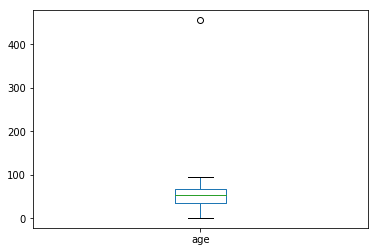

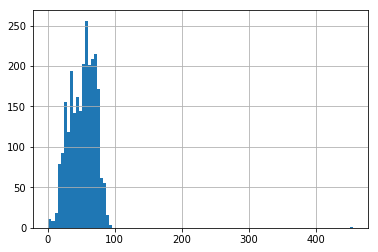

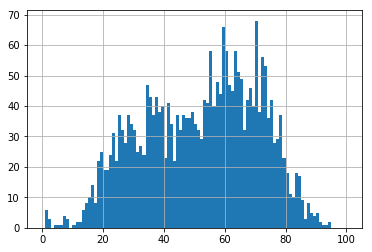

In [37]:
train_data['age'].plot.box()
plt.figure()
train_data['age'].hist(bins=100)
plt.figure()
train_data['age'].hist(bins=100, range=(0,100))
plt.figure()

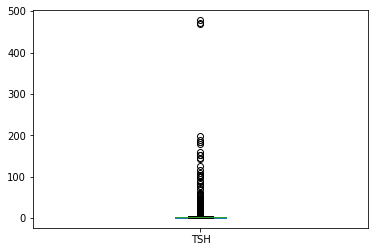

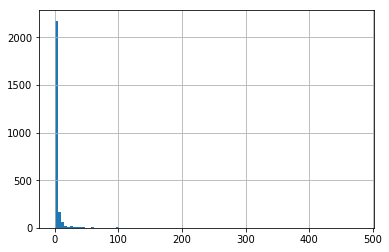

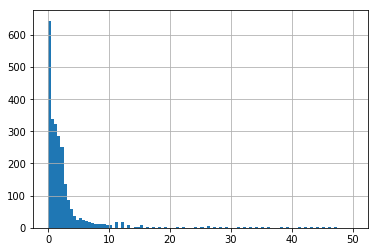

In [36]:
train_data['TSH'].plot.box()
plt.figure()
train_data['TSH'].hist(bins=100)
plt.figure()
train_data['TSH'].hist(bins=100, range=(0, 50.0))
plt.figure()

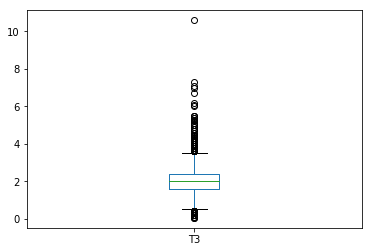

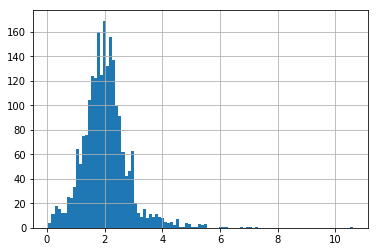

In [38]:
train_data['T3'].plot.box()
plt.figure()
train_data['T3'].hist(bins=100)
plt.figure()

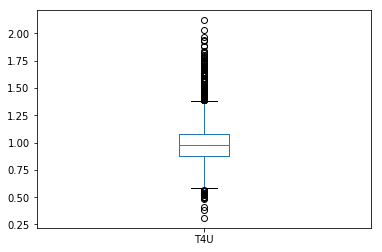

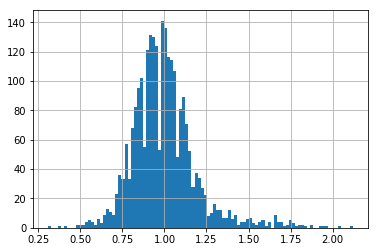

In [39]:
train_data['T4U'].plot.box()
plt.figure()
train_data['T4U'].hist(bins=100)
plt.figure()

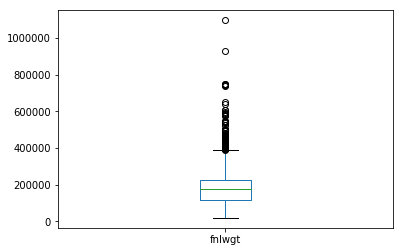

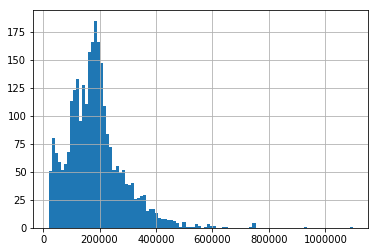

In [95]:
train_data['fnlwgt'].plot.box()
plt.figure()
train_data['fnlwgt'].hist(bins=100)
plt.figure()

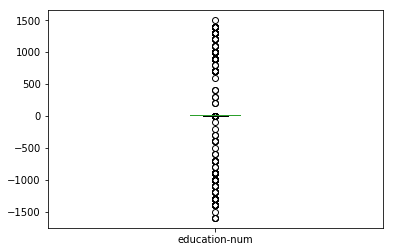

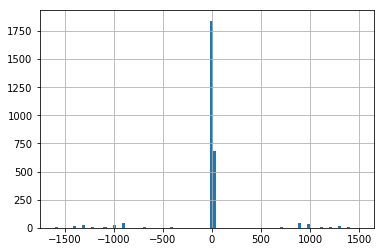

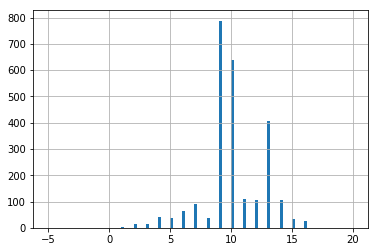

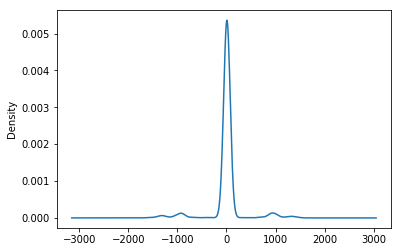

In [64]:
train_data['education-num'].plot.box()
plt.figure()
train_data['education-num'].hist(bins=100)
plt.figure()
train_data['education-num'].hist(bins=100, range=(-5, 20))
plt.figure()
train_data['education-num'].plot(kind="density")

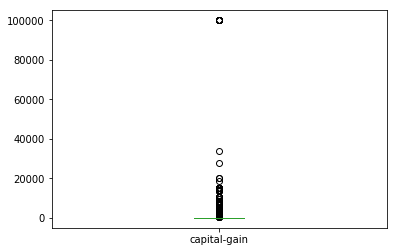

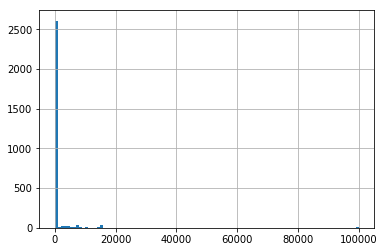

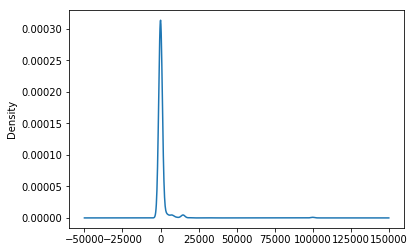

In [63]:
train_data['capital-gain'].plot.box()
plt.figure()
train_data['capital-gain'].hist(bins=100)
plt.figure()
train_data['capital-gain'].plot(kind="density")


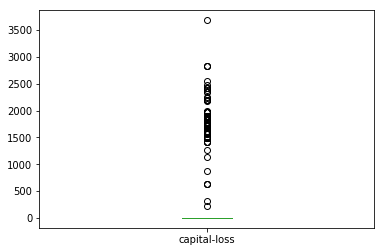

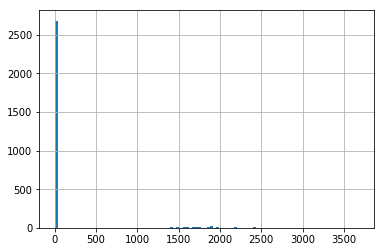

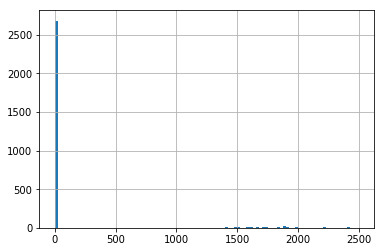

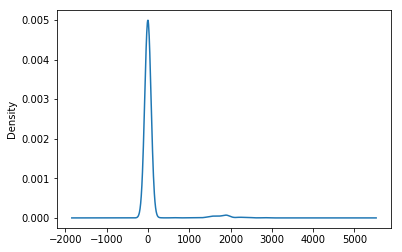

In [62]:
train_data['capital-loss'].plot.box()
plt.figure()
train_data['capital-loss'].hist(bins=100)
plt.figure()
train_data['capital-loss'].plot(kind="density")

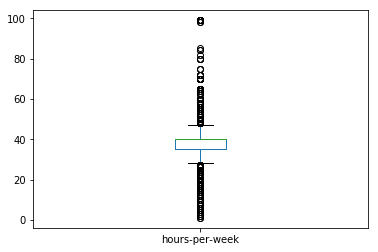

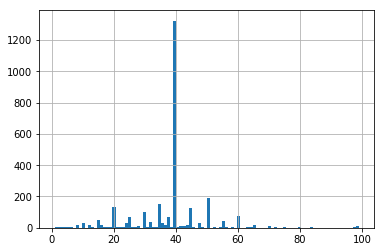

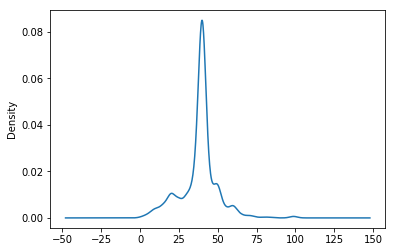

In [61]:
train_data['hours-per-week'].plot.box()
plt.figure()
train_data['hours-per-week'].hist(bins=100)
plt.figure()
train_data['hours-per-week'].plot(kind="density")

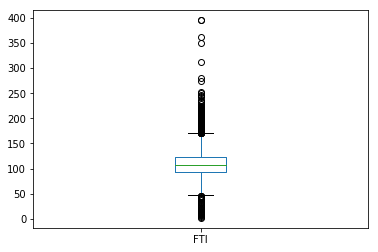

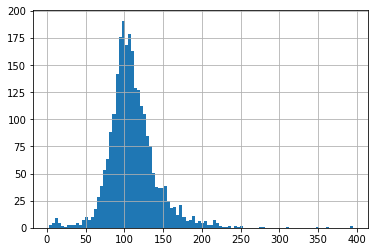

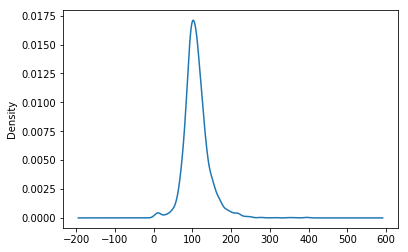

In [16]:
train_data['FTI'].plot.box()
plt.figure()
train_data['FTI'].hist(bins=100)
plt.figure()

In [40]:
train_data.describe(include=['O'])

,on thyroxine,query on thyroxine,pregnant,thyroid surgery,I131 treatment,lithium,goitre,tumor,hypopituitary,T3 measured,TT4,FTI measured,TBG measured,TBG,referral source,class,workclass,education,marital-status,occupation,relationship,race,native-country,date_of_birth,TSH measured,sex,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2451,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2799,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,6,2,2,2,2,2,2,2,2,2,213,2,1,1,5,2800,14,16,7,26,6,5,38,2721,2,3,2,2,2,210,2,2,2,2
top,f,f,f,f,f,f,f,f,f,t,??,t,f,?,other,negative.|373,Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,United-States,1953-02-28,t,F,f,t,f,?,f,t,f,f
freq,2223,2760,2759,2761,2752,2786,2775,2729,2799,2215,99,2505,2800,2800,1632,1,1774,879,1118,449,899,2318,2493,3,2516,1830,2627,2616,2766,295,2690,2503,2665,2637


In [30]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(column, ':')
        for val in train_data[column].unique():
            print ('   |' + val)
        print()

on thyroxine :
   |f
   |F
   |FALSE
   |t
   |TRUE
   |T

query on thyroxine :
   |f
   |t

pregnant :
   |f
   |t

thyroid surgery :
   |f
   |t

I131 treatment :
   |f
   |t

lithium :
   |f
   |t

goitre :
   |f
   |t

tumor :
   |f
   |t

hypopituitary :
   |f
   |t

T3 measured :
   |t
   |f

FTI measured :
   |t
   |f

TBG measured :
   |f

TBG :
   |?

referral source :
   |SVI
   |other
   |SVHC
   |STMW
   |SVHD

workclass :
   | Local-gov
   | Self-emp-not-inc
   |private
   | Self-emp-inc
   | Private
   | ?
   | State-gov
   |federal-gov
   |local-gov
   | Federal-gov
   |self-emp-not-inc
   |?
   |self-emp-inc
   |state-gov

education :
   | Assoc-voc
   | Bachelors
   | Some-college
   | HS-grad
   | 11th
   | Assoc-acdm
   | 12th
   | 10th
   | Masters
   | 9th
   | 7th-8th
   | Preschool
   | Prof-school
   | 1st-4th
   | Doctorate
   | 5th-6th

marital-status :
   | Married-civ-spouse
   | Divorced
   | Widowed
   | Never-married
   | Separated
   | Married-spouse-abs

In [34]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        print(train_data[column].value_counts())
        print()

f        2223
t         297
F         126
FALSE     121
TRUE       19
T          14
Name: on thyroxine, dtype: int64

f    2760
t      40
Name: query on thyroxine, dtype: int64

f    2759
t      41
Name: pregnant, dtype: int64

f    2761
t      39
Name: thyroid surgery, dtype: int64

f    2752
t      48
Name: I131 treatment, dtype: int64

f    2786
t      14
Name: lithium, dtype: int64

f    2775
t      25
Name: goitre, dtype: int64

f    2729
t      71
Name: tumor, dtype: int64

f    2799
t       1
Name: hypopituitary, dtype: int64

t    2215
f     585
Name: T3 measured, dtype: int64

t    2505
f     295
Name: FTI measured, dtype: int64

f    2800
Name: TBG measured, dtype: int64

?    2800
Name: TBG, dtype: int64

other    1632
SVI       771
SVHC      275
STMW       91
SVHD       31
Name: referral source, dtype: int64

 Private             1774
private               200
 Local-gov            192
 Self-emp-not-inc     160
 ?                    152
 State-gov            113
 Federal-go

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


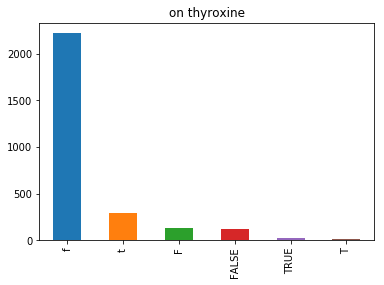

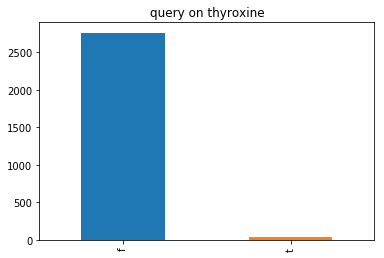

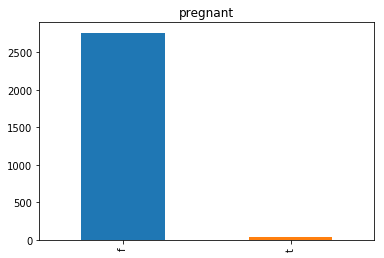

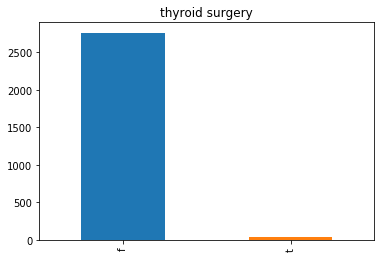

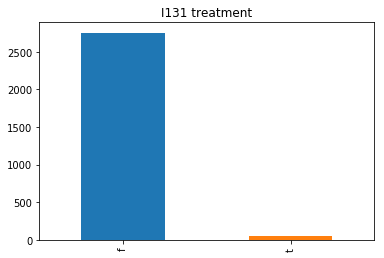

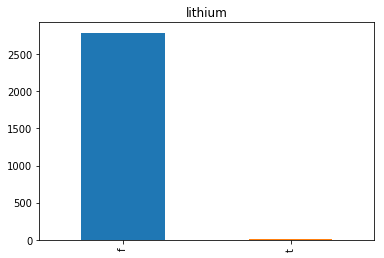

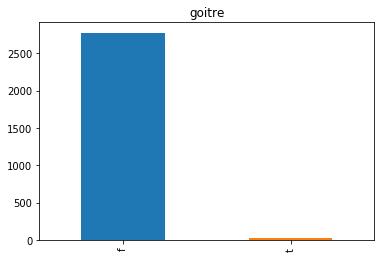

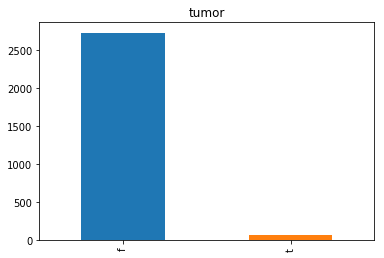

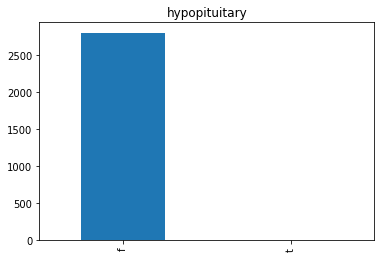

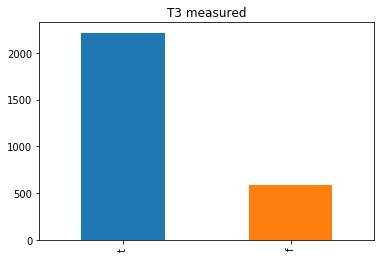

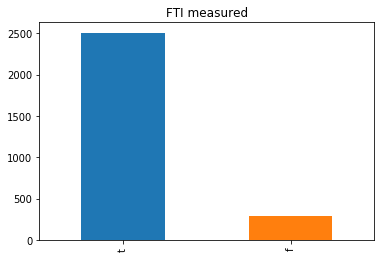

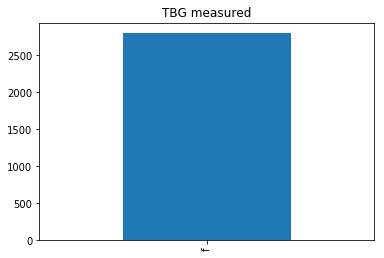

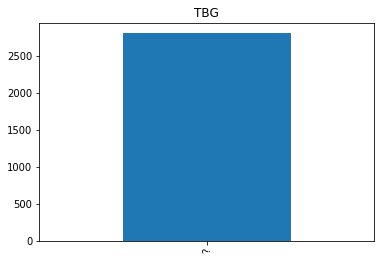

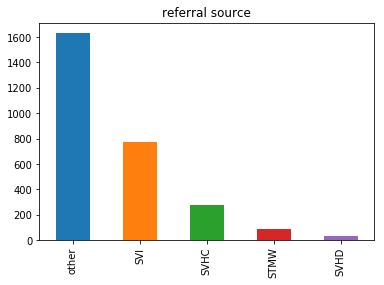

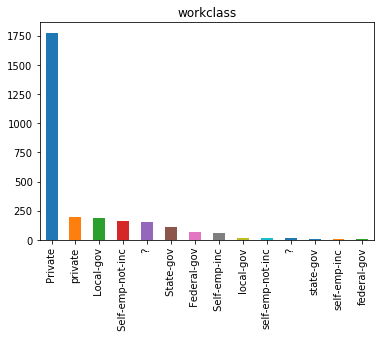

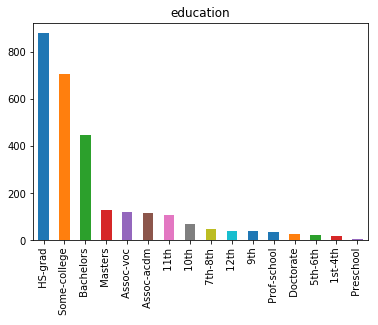

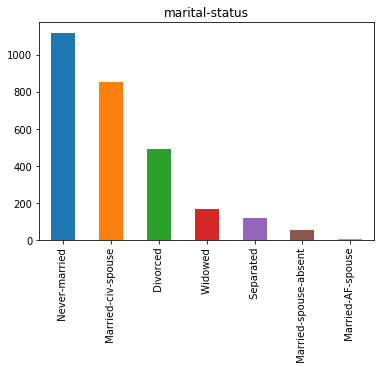

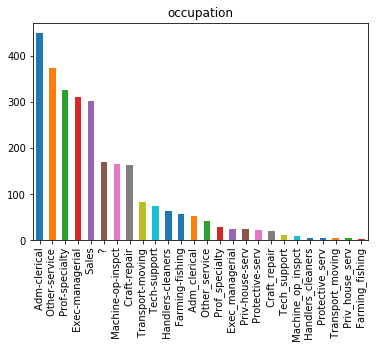

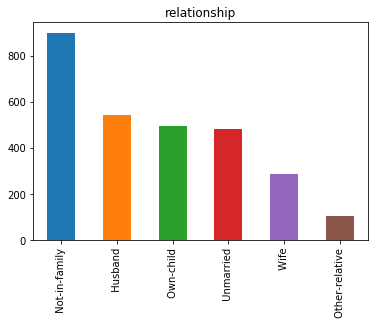

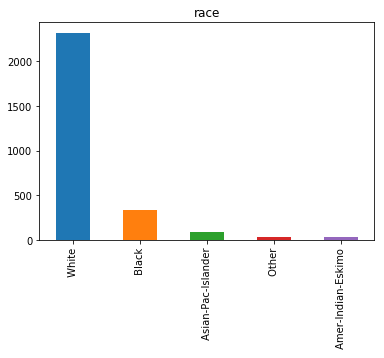

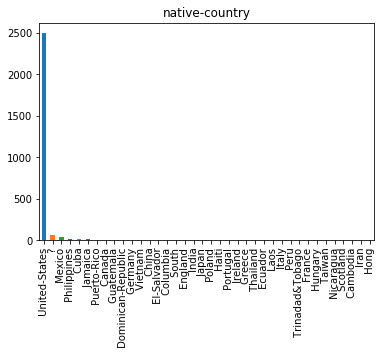

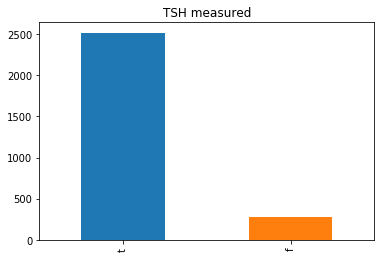

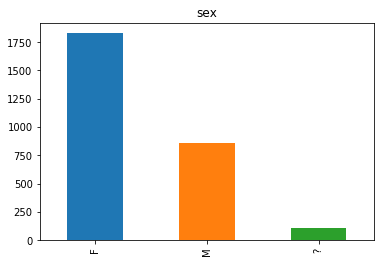

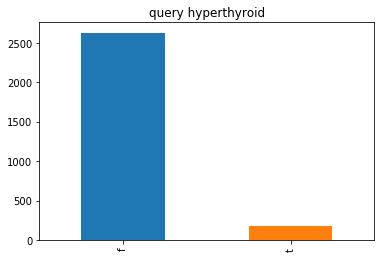

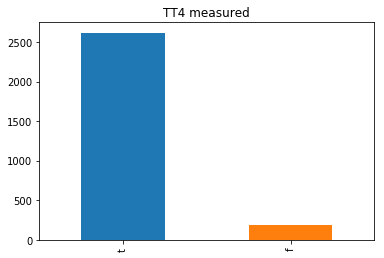

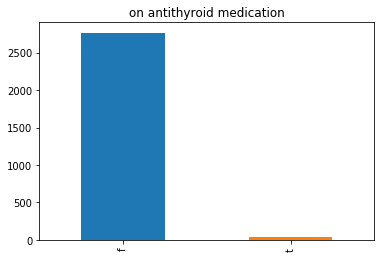

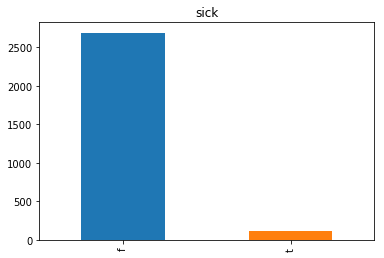

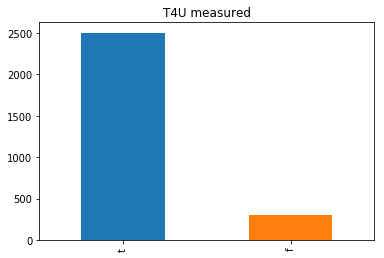

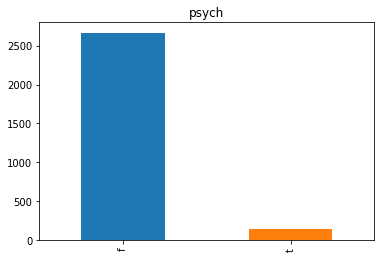

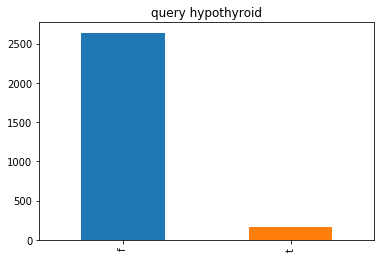

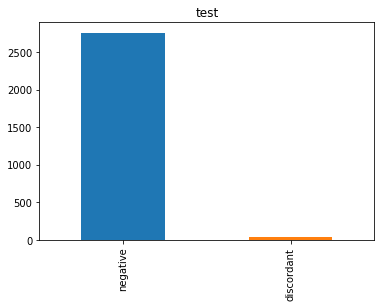

In [31]:
for column in train_data.columns[train_data.dtypes == np.object]:
    if train_data[column].unique().size < 50:
        train_data[column].value_counts().plot(kind='bar', title=column)
        plt.figure()

In [86]:
train_data['hypopituitary'].value_counts()

f    2799
t       1
Name: hypopituitary, dtype: int64

In [60]:
for column in train_data.columns:
    b = train_data[column].isnull()
    print(column, ": ", b[b == True].count())

age :  281
on thyroxine :  0
query on thyroxine :  0
pregnant :  0
thyroid surgery :  0
I131 treatment :  0
lithium :  0
goitre :  0
tumor :  0
hypopituitary :  0
TSH :  284
T3 measured :  0
T3 :  585
TT4 :  349
T4U :  297
FTI measured :  0
TBG measured :  0
TBG :  0
referral source :  0
class :  0
workclass :  0
fnlwgt :  0
education :  0
education-num :  0
marital-status :  0
occupation :  0
relationship :  0
race :  0
capital-gain :  0
capital-loss :  0
hours-per-week :  0
native-country :  0
date_of_birth :  1
TSH measured :  0
sex :  0
query hyperthyroid :  0
TT4 measured :  0
on antithyroid medication :  0
FTI :  0
sick :  0
T4U measured :  0
psych :  0
query hypothyroid :  0


Age-TSH correlation:  -0.06468098608047428


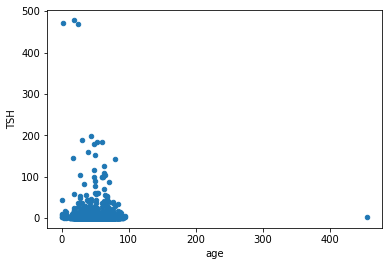

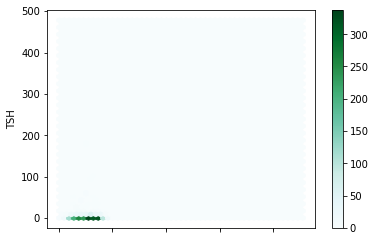

In [76]:
#v tychto bunkach nizsie som len skusal jednotlive techniky
#nieco som cerpal z materialov co ma cviciaci na git-e, nieco je z https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas
print("Age-TSH correlation: ", train_data['age'].corr(train_data['TSH']))
train_data.plot.scatter(x='age', y='TSH')
plt.figure()
train_data.plot.hexbin(x='age', y='TSH', gridsize=50)
plt.figure()

In [96]:
cross = pd.crosstab(index=train_data["sex"], columns=train_data["sick"])
cross

sick,f,t
sex,,
?,108,2
F,1757,73
M,825,35


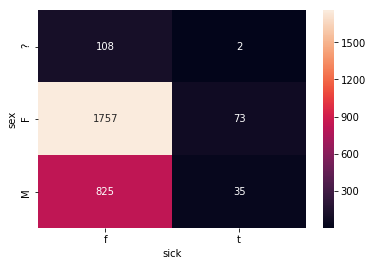

In [94]:
sns.heatmap(cross, annot=True, fmt="d")

In [95]:
crossNorm = pd.crosstab(index=train_data["sex"], columns=train_data["sick"], normalize='index')
crossNorm

sick,f,t
sex,,
?,0.981818,0.018182
F,0.960109,0.039891
M,0.959302,0.040698


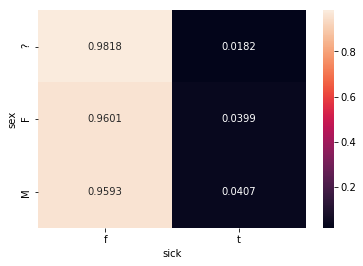

In [93]:
sns.heatmap(crossNorm, annot=True, fmt=".4f")

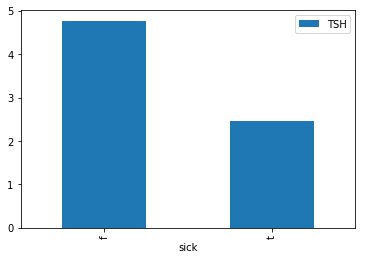

In [22]:
pokemon_stats_by_generation = train_data.groupby('sick').mean()[['TSH']]
pokemon_stats_by_generation.plot.bar(stacked=True)
plt.figure()

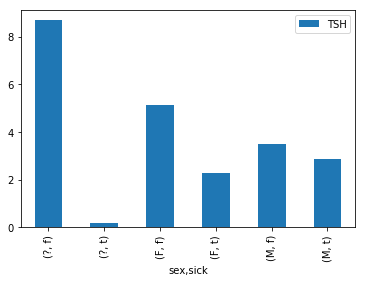

In [21]:
pokemon_stats_by_generation = train_data.groupby(['sex', 'sick']).mean()[['TSH']]
pokemon_stats_by_generation.plot.bar(stacked=True)
plt.figure()

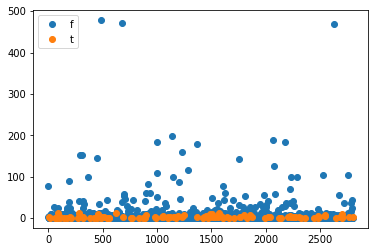

In [60]:
fig, ax = plt.subplots()
for name, group in train_data.groupby('sick'):
    ax.plot(group.TSH, marker='o', linestyle='', label=name)
ax.legend()

plt.show()

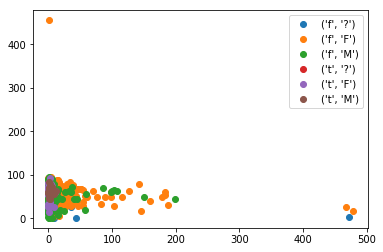

In [59]:
fig, ax = plt.subplots()
for name, group in train_data.groupby(['sick', 'sex']):
    ax.plot(group.TSH, group.age, marker='o', linestyle='', label=name)
ax.legend()

plt.show()

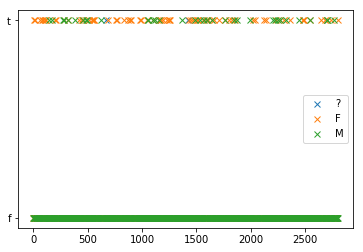

In [5]:
fig, ax = plt.subplots()
for name, group in train_data.groupby('sex'):
    ax.plot(group.sick, marker='x', linestyle='', label=name)
ax.legend()

plt.show()

TODO:
    -najdenie lepsieho nazvu pre dokument
    -bivarietna analyza
    -identifikacia outlierov
    -popis
    -ako odstranime nekonzistencie (popis)
    -ako vyriesime nezname prvky (popis)